## Policing in Schools
A look at whether school policing can predict graduation rates.

By Onel Abreu, Alexander Roche, Sabrina Sedovic

In [14]:
%load_ext autoreload
%autoreload 2
import pandas as pd

school_data = pd.read_csv("school_data.csv")
school_data.head(10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Unnamed: 0  Unnamed: 0.1  Year  Dept/Unit Number  \
0          16            16  2012             26861   
1          17            17  2013             26861   
2          18            18  2014             26861   
3          19            19  2015             26861   
4          26            26  2012             41051   
5          27            27  2013             41051   
6          28            28  2014             41051   
7          29            29  2015             41051   
8          31            31  2012             41061   
9          32            32  2013             41061   

   Job Title_Chief Safety & Security OFF  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
5                                      0   
6                                      0   
7                                      0   
8                                      0   
9                                      0   

   Job Title_Flex Team Security Officer  Job Title_Safety And Security Off  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   
5                                     0                                  0   
6                                     0                                  0   
7                                     0                                  0   
8                                     0                                  0   
9                                     0                                  0   

   Job Title_School Security Officer  \
0                                  1   
1                                  1   
2                                  1   
3                                  1   
4                                  6   
5                                  8   
6                                  8   
7                                  7   
8                                  2   
9                                  2   

   Job Title_Senior School Security Officer  \
0                                         0   
1                                         3   
2                                         3   
3                                         2   
4                                         0   
5                                         1   
6                                         1   
7                                         2   
8                                         0   
9                                         0   

   Job Title_Senior Security Officer  ...  # of Unique Students Receiving OSS  \
0                                  0  ...                               118.0   
1                                  0  ...                               146.0   
2                                  0  ...                                78.0   
3                                  0  ...                                43.0   
4                                  0  ...                               219.0   
5                                  0  ...                               148.0   
6                                  0  ...                               130.0   
7                                  0  ...                               172.0   
8                                  0  ...                                73.0   
9                                  0  ...                               101.0   

   % of Unique Students Receiving OSS  Average Length of OSS  \
0                                26.2                   3.13   
1                                37.3                   2.85   
2         

In [15]:
school_data['Counselor_student_ratio'] = school_data['Total Counseling_Filled'] / school_data['Total_x']
school_data['Officer_student_ratio'] = school_data['Total Security_Filled'] / school_data['Total_x']
school_data = school_data.drop(columns = ["Unnamed: 0", "Unnamed: 0.1",
                                          "Dept/Unit Number", "Job Title_Chief Safety & Security OFF",
                                          "Job Title_Flex Team Security Officer",
                                          'Job Title_Safety And Security Off',
                                          'Job Title_Guidance Counselor Assistant',
                                          "Job Title_Career Counseling Manager",
                                          "Job Title_Director of Counseling",
                                          "Job Title_Director, School Counseling & Post Secondary Advising",
                                          "Job Title_HS Counseling Specialist", 
                                          "Job Title_K‐8 Counseling Specialist",
                                          "Job Title_Manager-Secdry Schl Counselng",
                                          'Job Title_Cntrl Office Security Officer',
                                          'Job Title_K-8 Counseling Specialist',"pos_name_0",
                                          "School_x", 'School Name_x',
                                          "School Name_y", "Total_y", 'School ID',
                                          "School Year"])

In [16]:
school_data.columns

Index(['Year', 'Job Title_School Security Officer',
       'Job Title_Senior School Security Officer',
       'Job Title_Senior Security Officer', 'Total Security',
       'Total Security_Filled', 'Job Title_School Counselor',
       'Total Counseling', 'Total Counseling_Filled', 'Total_x', 'Bilingual_N',
       'Bilingual_P', 'IEP_N', 'IEP_P', 'Free_Lunch_N', 'Free_Lunch_P',
       'Attendance', '5YR Grad Rate', 'White No', 'White Pct',
       'African American No', 'African American Pct',
       'Asian/Pacific Islander No', 'Asian/Pacific Islander Pct',
       'Native American/Alaskan No', 'Native American/Alaskan Pct',
       'Hispanic No', 'Hispanic Pct', 'Multi-Racial No', 'Multi-Racial Pct',
       'Asian No', 'Asian Pct', 'Hawaiian/Pacific Islander No',
       'Hawaiian/Pacific Islander Pct', 'Not Available No',
       'Not Available Pct', '# of Misconducts', '# of Group 1-2 Misconducts',
       '# of Group 3-4 Misconducts', '# of Group 5-6 Misconducts',
       '# of Suspensions

### Data Cleaning 

In [22]:
school_data.drop(school_data.loc[school_data["5YR Grad Rate"] == ' '].index, inplace=True)
school_data.dropna(subset=['5YR Grad Rate'], inplace=True)
school_data.reset_index(inplace=True)
school_data.drop("index", inplace=True, axis=1)
school_data.dropna(axis=0, inplace=True)
school_data['5YR Grad Rate'] =  school_data['5YR Grad Rate'].astype(float)

/home/sabrinarose9789/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


 ### Initial Data Analysis

In [23]:
school_data_analysis = school_data.copy()
school_data_analysis.rename({"Total Security_Filled": "Total Security Filled",
                             "Total Counseling_Filled": "Total Counseling Filled", 
                             "Total_x": "Total",
                             'Bilingual_P':"Bilingual Pct",
                             'IEP_P':"IEP Pct",
                             'Free_Lunch_P':"Free Lunch Pct"}, axis=1, inplace=True)
school_data_analysis["Bilingual Pct"] = school_data_analysis["Bilingual Pct"] * 100
school_data_analysis["IEP Pct"] = school_data_analysis["IEP Pct"] * 100
school_data_analysis["Free Lunch Pct"] = school_data_analysis["Free Lunch Pct"] * 100
school_data_analysis[["Total Security Filled", "Total Counseling Filled", "Total", "Expulsions per 100 Students"]].describe()

Total Security Filled  Total Counseling Filled        Total  \
count             384.000000               384.000000   384.000000   
mean                5.942708                 3.526042  1008.846354   
std                 3.550729                 2.678480   760.330071   
min                 0.000000                 0.000000    13.000000   
25%                 3.000000                 2.000000   462.750000   
50%                 5.000000                 3.000000   815.500000   
75%                 8.000000                 5.000000  1450.000000   
max                17.000000                15.000000  4366.000000   

       Expulsions per 100 Students  
count                   384.000000  
mean                      0.159167  
std                       0.333020  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.180000  
max                       1.940000

In [26]:
school_data_analysis[['Bilingual Pct', 'IEP Pct', 'Free Lunch Pct', 'White Pct',
       'African American Pct','Asian/Pacific Islander Pct', 'Native American/Alaskan Pct',
        'Hispanic Pct', 'Multi-Racial Pct', 'Asian Pct', 
       'Hawaiian/Pacific Islander Pct', 'Not Available Pct', 'Attendance', '5YR Grad Rate']].describe()

Bilingual Pct     IEP Pct  Free Lunch Pct   White Pct  \
count     384.000000  384.000000      384.000000  384.000000   
mean        6.369591   17.807824       87.644734    6.600781   
std         7.959759   15.077154       15.421721   10.690723   
min         0.000000    3.956311       30.891331    0.000000   
25%         0.390000   10.052772       84.772500    0.200000   
50%         2.280000   15.245000       94.350141    1.500000   
75%        10.654750   20.607500       96.971070    7.425000   
max        36.790000  100.000000      100.000000   48.900000   

       African American Pct  Asian/Pacific Islander Pct  \
count            384.000000                  384.000000   
mean              51.792188                    0.013802   
std               38.224488                    0.047848   
min                0.600000                    0.000000   
25%               12.575000                    0.000000   
50%               45.150000                    0.000000   
75%               96.800000                    0.000000   
max              100.000000                    0.400000   

       Native American/Alaskan Pct  Hispanic Pct  Multi-Racial Pct  \
count                   384.000000    384.000000        384.000000   
mean                      0.313281     36.668490          1.004427   
std                       0.495784     32.566264          1.206794   
min                       0.000000      0.000000          0.000000   
25%                       0.000000      1.900000          0.200000   
50%                       0.300000     32.000000          0.600000   
75%                       0.500000     66.550000          1.400000   
max                       7.700000     98.900000          6.000000   

        Asian Pct  Hawaiian/Pacific Islander Pct  Not Available Pct  \
count  384.000000                     384.000000         384.000000   
mean     3.140885                       0.093750           0.379427   
std      5.435059                       0.151967           0.968657   
min      0.000000                       0.000000           0.000000   
25%      0.000000                       0.000000           0.000000   
50%      0.300000                       0.000000           0.000000   
75%      3.350000                       0.200000           0.300000   
max     28.700000                       1.300000           8.500000   

       Attendance  5YR Grad Rate  
count  384.000000     384.000000  
mean    86.002344      67.525781  
std      7.111838      16.903166  
min     32.800000       8.700000  
25%     82.000000      54.825000  
50%     87.750000      68.750000  
75%     91.000000      80.725000  
max     97.200000      98.500000

In [31]:
school_data_analysis.groupby("Year")[["Total Security Filled", "Total Counseling Filled", "Total", "Expulsions per 100 Students"]].sum()

Total Security Filled  Total Counseling Filled  Total  \
Year                                                          
2012                    393                      300  79836   
2013                    487                      280  77702   
2014                    490                      273  87236   
2015                    452                      260  74961   
2016                    460                      241  67662   

      Expulsions per 100 Students  
Year                               
2012                        24.28  
2013                        15.32  
2014                         9.82  
2015                         7.71  
2016                         3.99

In [33]:
school_data_analysis.groupby("Year")[['Bilingual Pct', 'IEP Pct', 'Free Lunch Pct', 'Attendance', '5YR Grad Rate']].mean()

Bilingual Pct    IEP Pct  Free Lunch Pct  Attendance  5YR Grad Rate
Year                                                                     
2012       5.341486  17.801486       90.529730   81.870270      59.190541
2013       6.028592  17.445634       88.776761   84.619718      64.667606
2014       6.421398  17.676866       85.429863   86.907955      67.480682
2015       6.616835  18.436203       87.960886   88.001266      70.569620
2016       7.427917  17.642083       85.923472   88.312500      75.626389

Some initial notes from the preliminary data analysis:
- Filled security positions have remained somewhat consistent over the years, with a sudden increase in 2013 and then relatively around the same amount for the following year
- Counselors, however, have steadily fallen over the 5 year span being examined.
- Total amount of students at CPS schools also decreased suddenly in 2016, and had a sudden increase in 2014.
- Total suspensions have also dropped extremely since 2012, due to new policy enacted to ensure students were only being expelled with due process.
- Percentage of African American students have decreased, while Percentage of Hispanic students have increased (Bilingual students have also increased alongside this).
- Percentage of Free and Reduced lunch students has decreased
- Attendance, in general, was on the rise, along with an extreme rise in 5 year graduation rates.

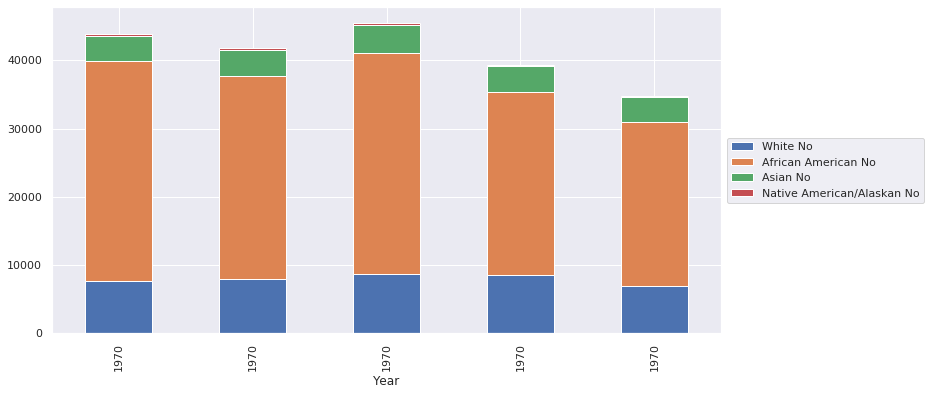

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

sns.set(rc={'figure.figsize':(11.7,8.27)})
school_data_analysis["Year"] = pd.to_datetime(school_data_analysis["Year"], format='%Y%')
total = school_data_analysis.groupby('Year')[['White No', 
                                     'African American No', 
                                     'Asian No',
                                      'Native American/Alaskan No',
                                               ]].sum().reset_index()
total["Year"] = total["Year"].dt.year

plot = total.plot.bar(stacked=True, x='Year', figsize=(12,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.show()

### Pipeline

In [10]:
import grid_search

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
models = {"LinearRegression" : LinearRegression(),
          "Ridge" : Ridge(),
          "Lasso" : Lasso(),
          "ElasticNet" : ElasticNet()}

p_grid = {"LinearRegression" : [{}],
          "Ridge" : [{"alpha" : x} for x in [.1, .5, 1, 5, 10, 50, 100, 500, 1000]],
          "Lasso" : [{"alpha" : x} for x in [.1, .5, 1, 5, 10, 50, 100, 500, 1000]],
          "ElasticNet" : [{"alpha" : x,
                         "l1_ratio" : y} 
                          for x in [.1, 1, 10, 100, 1000] 
                          for y in [.1, .3, .5, .7, .9]]}

In [55]:
test_results, best = grid_search.choose_and_test_model(school_data, models, p_grid)

In [56]:
test_results

{'RMSE': 10.418729889186258,
 'MAE': 8.391580610333206,
 'r^2': 0.493614442156151}

In [57]:
best

Model                                       RandomForestRegressor
Params          {'n_estimators': 50, 'max_depth': 5, 'min_samp...
RMSE                                                      8.44774
RMSE std dev                                              1.02465
MAE                                                       6.47725
R^2                                                      0.715856
Name: 53, dtype: object

In [66]:
import helper

coefs, results = helper.find_features(school_data, best)
coefs.head(20)

coef
Attendance                                          0.46
IEP_P                                               0.20
Bilingual_P                                         0.07
% of Unique Students Receiving OSS                  0.03
Free_Lunch_N                                        0.03
OSS per 100 Students                                0.02
Total_x                                             0.02
Bilingual_N                                         0.02
Officer_student_ratio                               0.01
# of Group 1-2 Misconducts                          0.01
Hispanic Pct                                        0.01
African American Pct                                0.01
# of Group 5-6 Misconducts                          0.01
% of Misconducts Resulting in a Police Notifica...  0.01
African American No                                 0.01
Free_Lunch_P                                        0.01
IEP_N                                               0.01
# of Group 3-4 Misconducts                          0.01
Police Notifications per 100 Students               0.00
% of Unique Students Receiving ISS                  0.00

In [90]:
school_data['Misconduct_student_ratio'] = school_data['# of Misconducts'] / school_data['Total_x']
subset = school_data[["Year", "Officer_student_ratio", "Expulsions per 100 Students", "5YR Grad Rate", "Attendance",
                      "% of Unique Students Receiving Police Notification", 'Native American/Alaskan Pct',
                      "IEP_P", "Asian Pct", "Free_Lunch_P", "White Pct",'African American Pct',
                      "Hispanic Pct", 'Multi-Racial Pct', 'Counselor_student_ratio', 'Bilingual_P',
                     '% of Unique Students Receiving OSS', '% of Unique Students Receiving ISS',
                     'Not Available Pct']]

In [61]:
school_data_analysis = school_data.copy()
school_data_analysis['Counselor_student_ratio'] = school_data_analysis['Total Counseling_Filled'] / school_data_analysis['Total_x']
school_data_analysis['Officer_student_ratio'] = school_data_analysis['Total Security_Filled'] / school_data_analysis['Total_x']
school_data_analysis['misconduct_student_ratio'] = school_data_analysis['# of Misconducts'] / school_data_analysis['Total_x']
school_data_analysis['pct_misconduct_grp_1-2'] = school_data_analysis['# of Group 1-2 Misconducts'] / school_data_analysis['# of Misconducts']
school_data_analysis['pct_misconduct_grp_3-4'] = school_data_analysis['# of Group 3-4 Misconducts'] / school_data_analysis['# of Misconducts']
school_data_analysis['pct_misconduct_grp_5-6'] = school_data_analysis['# of Group 5-6 Misconducts'] / school_data_analysis['# of Misconducts']

subset_2 = school_data_analysis[['Year','Bilingual_P', 'IEP_P', 'Free_Lunch_P', 'White Pct',
       'African American Pct','Asian/Pacific Islander Pct', 'Native American/Alaskan Pct',
        'Hispanic Pct', 'Multi-Racial Pct', 'Asian Pct', 
       'Hawaiian/Pacific Islander Pct', 'Not Available Pct', 'Attendance',
        'misconduct_student_ratio',  
        '% of Unique Students Receiving ISS',
        '% of Unique Students Receiving OSS',
        'Police Notifications per 100 Students',
        'Expulsions per 100 Students',
        'Counselor_student_ratio',
        'Officer_student_ratio', 
        '5YR Grad Rate']]

In [91]:
test_results2, best2 = grid_search.choose_and_test_model(subset, models, p_grid)

In [92]:
test_results2

{'RMSE': 10.093004597863562,
 'MAE': 8.310702910484244,
 'r^2': 0.5247822042841483}

In [93]:
best2

Model                   Ridge
Params          {'alpha': 10}
RMSE                  8.99527
RMSE std dev         0.450987
MAE                   6.82569
R^2                  0.680742
Name: 5, dtype: object

In [94]:
coefs, results = helper.find_features(subset, best2)
coefs

65.65641025641027


coef
Attendance                                          6.73
Counselor_student_ratio                             1.37
Multi-Racial Pct                                    1.07
Not Available Pct                                   0.45
Hispanic Pct                                        0.44
African American Pct                               -0.00
Asian Pct                                          -0.30
Native American/Alaskan Pct                        -0.71
% of Unique Students Receiving Police Notification -1.04
White Pct                                          -1.10
% of Unique Students Receiving ISS                 -1.18
Free_Lunch_P                                       -1.20
Expulsions per 100 Students                        -1.23
% of Unique Students Receiving OSS                 -3.36
Officer_student_ratio                              -3.38
Bilingual_P                                        -4.28
IEP_P                                              -4.61

In [28]:
results

(10.093004597863562, 8.310702910484244, 0.5247822042841483)

In [67]:
top_5 = school_data[["Free_Lunch_P", "Expulsions per 100 Students", "Year",
               "% of Unique Students Receiving OSS", "Total Counseling",
               "Officer_student_ratio", "Bilingual_P", "IEP_P", "5YR Grad Rate"]]
df = helper.polynomial_transform(top_5)
test_resultsply, bestply = grid_search.choose_and_test_model(df, models, p_grid)

In [68]:
test_resultsply

{'RMSE': 11.289912221795072,
 'MAE': 8.81744192290623,
 'r^2': 0.40538907554935766}

In [69]:
bestply

Model                                       RandomForestRegressor
Params          {'n_estimators': 100, 'max_depth': 5, 'min_sam...
RMSE                                                      9.87356
RMSE std dev                                              1.18215
MAE                                                       7.29113
R^2                                                      0.611561
Name: 65, dtype: object

In [70]:
coefs, results = helper.find_features(top_5, bestply)
coefs

coef
IEP_P                               0.54
% of Unique Students Receiving OSS  0.24
Bilingual_P                         0.10
Officer_student_ratio               0.06
Free_Lunch_P                        0.04
Expulsions per 100 Students         0.02
Total Counseling                    0.01

In [37]:
results

(11.463017004213379, 9.588047291257261, 0.3870153114706877)

### Evaluation